## Testing The Chatbot Filtering

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

DATABASE_FILE = "../trivago_data/pandas_dbs/dataset.pkl"
db = pd.read_pickle(DATABASE_FILE)

In [3]:
db.head()

hotel_name city price quality_test total_rat premium        lat  \
0            Sant Cugat    2   113            0         0       0  41.470749   
1        Hotel HCC Open    2    90            0         0       0  41.381699   
2       Sansi Diputacio    2   109            0         0       0  41.388302   
3  Hotel Arts Barcelona    2   329            0         0       0  41.387001   
4    Medium Sitges Park    2    70            0         0       0  41.237034   

        lon part_total_rat breakfast    ...     bar_in_hotel_free gym_free  \
0  2.085879           1023        78    ...                   0.0      0.0   
1    2.1551           1305        73    ...                   0.0      0.0   
2    2.1646            896        69    ...                   0.0      0.0   
3    2.1964           2626        75    ...                   0.0      0.0   
4   1.81022           2271        74    ...                   0.0      0.0   

  pet_allowed_free parking_free pool_free restaurant_free spa_free  \
0              0.0          0.0       0.0             0.0      0.0   
1              0.0          0.0       0.0             0.0      0.0   
2              0.0          0.0       0.0             0.0      0.0   
3              0.0          0.0       0.0             0.0      0.0   
4              0.0          0.0       0.0             0.0      0.0   

  wifi_room_free wifi_hall_free hotel_type  
0            1.0            1.0          5  
1            1.0            1.0          5  
2            1.0            1.0          5  
3            0.0            1.0          5  
4            1.0            1.0          5  

[5 rows x 84 columns]

### Getting the neighbourhoods for Barcelona

In [5]:
from shapely.geometry import shape, Point
import json

f_geojson = "neighbourhoods.geojson"

# get json file as js
with open(f_geojson,'r') as f:
    js = json.load(f)


In [11]:
neighbourhoods = {}

for row in db.iterrows():
    neighbourhoods[row[0]] = "" # key: index
    lat = float(row[1]['lat'])
    lon = float(row[1]['lon'])
    p = Point(lon,lat)
    for feature in js['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(p):
            neighbourhoods[row[0]] = (feature['properties']['neighbourhood'].encode('ascii','ignore'))
            break

In [12]:
neighs = pd.DataFrame(index = neighbourhoods.keys(), columns=["neighbourhood"], data = neighbourhoods.values())
db["neighbourhood"] = neighs.neighbourhood

In [19]:
db.neighbourhood.ix[7]

''

In [29]:
db.loc[db.neighbourhood == '','neighbourhood'] = "outskirt"

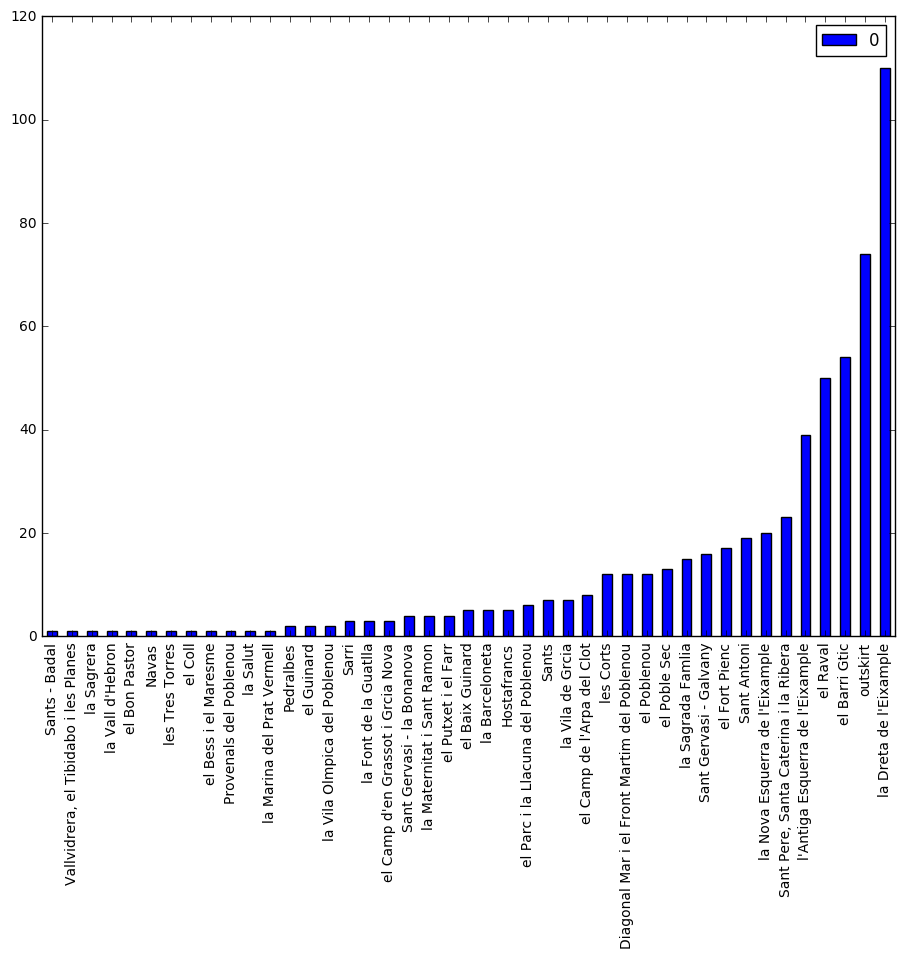

In [34]:
from collections import Counter

nb_counts = Counter(db.neighbourhood)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar', figsize=(11,8))

### Finding the GPS coodinates of a circle around a certain GPS location

http://stackoverflow.com/questions/15886846/python-elegant-way-of-finding-the-gps-coodinates-of-a-circle-around-a-certain-g

http://www.movable-type.co.uk/scripts/latlong.html

